## 단순선형회귀분석
독립변수가 1개인 회귀분석

In [1]:
import pandas as pd                                                  # Dataframe 활용 라이브러리
import numpy as np                                                   # 행렬 활용 라이브러리
import statsmodels.api as sm                                         # 통계기법 활용 라이브러리

# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [2]:
boston_data = boston.drop(["Target"], axis=1)
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [3]:
target = boston[["Target"]]
crim = boston[["CRIM"]]
rm = boston[["RM"]]
lstat = boston[["LSTAT"]]

In [4]:
# target - crim 선형회귀분석

# 선형회귀분석을 위해 b0항을 더해준다.
crim1 = sm.add_constant(crim, has_constant = "add")
crim1

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [5]:
# sm OLS 적합
crim_model = sm.OLS(target, crim1)
crim_model = crim_model.fit()

# summary를 통한 결과 출력
# 회귀분석에는 잔차의 정규분포/등분산이 가정되어야 한다.
crim_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.17e-19
Time:                        15:59:35   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### summary 해석
- Dep. Variable: Dependent variable, 즉 종속변수를 의미한다.
- Model: 모델링 방법을 뜻하고, OLS는  Ordinary Least Squares의 약자이다.
- No. Observations: Number of observations, 관찰표본 수, 즉 총 표본 수를 뜻한다. 
- Df Residuals: DF는 Degree of Freedom으로 자유도를 뜻하는데, DF Residuals는 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구한다. 이번 회귀분석에서 DF Residuals를 구하자면,  전체 표본 수 506개 - 종속변수1개 - 독립변수1개 = 504로 구할 수 있다.
- Df Model: 독립변수의 개수이다.
- R squared: R의 제곱이라는 뜻이고 결정계수를 의미한다. 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력을 나타낸다. SSR/SST이나 상관계수 R을 제곱해서 구할 수 있다.
- F-statistics: F통계량을 뜻한다. F통계량은 MSR/MSE로 구할 수 있다.
- Prob: F통계량에 해당하는 P-value를 의미한다. P는 Probability의 첫글자이다.
- const coef: Intercept coefficient는 회귀식의 절편 값을 의미한다. (상수항)
- CRIM coef: 독립변수 coefficient는 독립변수 "speed"의 회귀계수를 의미하며, 회귀식에서 기울기를 의미한다.
- AIC와 BIC : 두개 모두 모형 적합정도를 나타내는 잔차제곱합과 변수의 개수가 많은 모형은 피하도록 벌점(penalty)항으로 이루어져 있습니다. AIC 값이 작은 모형을 더 선호하며 BIC도 마찬가지로 값이 작은 모형을 선호하게 됩니다.

R-squared 값이 0.151로 낮기 때문에 더 높은 영향력을 가지는 변수를 추가하거나, 다른 변수로 대체해야 한다.

In [6]:
# 방법1 - Y_hat = beta0 + beta1*X 계산하기
pred0 = np.dot(crim1, crim_model.params)

# 방법2 - predict함수를 통해 Y_hat 구하기
pred1 = crim_model.predict(crim1)

# numpy를 사용하여 직접구한 Y_hat과 predict함수를 통해 구한 Y_hat은 차이가 없다ㅠ
# 모든 predict 행 오차 = 0
pred0 - pred1                                       

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

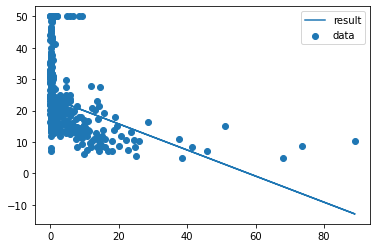

In [7]:
import matplotlib.pyplot as plt

plt.scatter(crim, target, label = "data")
plt.plot(crim, pred1, label="result")
plt.legend()
plt.show()

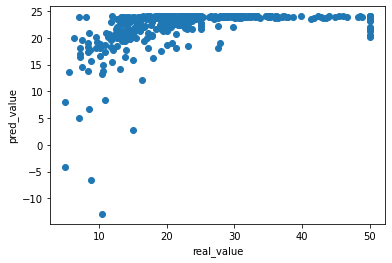

In [8]:
# 실제값과 예측(단순 선형회귀)값 비교

plt.scatter(target, pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

# 아래 그래프를 보면 단순 선형회귀가 개별 변수들을 예측하는 것에는 한계가 있음을 보인다.
# 만약 완전하게 예측을 진행한다면, Y축 값과 X축 값은 항상 같은 결과가 나와야한다.
# 즉, Y = X 그래프이어야 한다. 

# 선형 회귀분석은 사실 현실 데이터에서 추세를 알고자 하는 용도로 쓸 순 있겠지만
#, 실제로 이 회귀분석을 통해 값을 예측하고 적용하기에는 한계가 있다.

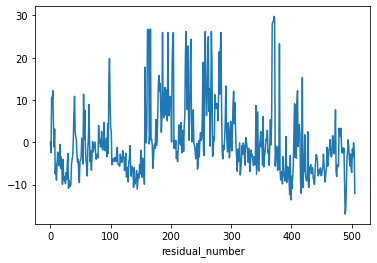

In [9]:
## residual 시각화

crim_model.resid.plot()                
# model.resid는 각 항의 예측값과 실제값의 오차를 Series형태로 출력해주는 함수이다. 

plt.xlabel("residual_number")
plt.show()

## 다중선형회귀
독립변수가 2개 이상인 선형회귀

In [10]:
target = boston[['Target']] # Target 변수저장
x_data = boston[["CRIM","RM","LSTAT"]]
# df[[col]] - DataFrame형태로 컬럼 추출 / df[col] - Series형태로 컬럼추출

x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [11]:
# 회귀분석을 하기 위한 B_0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# 회귀모델 적합
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

# summary함수를 통해 OLS 결과 출력
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.01e-112
Time:                        15:59:37   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
## 다중선형회귀모델의 회귀 계수
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


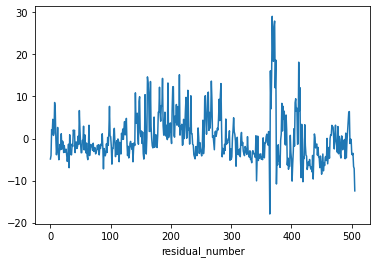

In [15]:
# y_hat 구하기

pred4 = fitted_multi_model.predict(x_data1)

# residual plot 구하기

fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

단순회귀분석보다 다중선형회귀분석의 경우 R^2값이 가장 높다. 하지만 다중공선성의 문제가 발생할 수 있다. 그리고 더 좋은 변수가 있는지 또한 데이터에서 검정을 통해 확인해봐야한다.

## 다중공선성 확인하기

In [16]:
# crim, rm, lstat을 통한 다중 선형회귀분석
x_data = boston[["CRIM","RM","LSTAT"]] #변수 여러개
target = boston[["Target"]]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.01e-112
Time:                        16:00:24   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

다중공선성은 절대적으로 어떤 방법으로 확인하는 것이 마는자, 그리고 어떻게 하면 해결되는지 획일화된 방법이 없다. 아래의 3가지 방법을 통해 다중공선성을 확인한다.
1. 결정계수(R^2)와 유의확률(p-value)을 활용한 다중공선성 확인
2. 상관계수 및 산점도를 통한 다중공선성 확인
3. VIF를 통한 다중공선성 확인

In [17]:
# crim, rm, lstat, b ,tax ,age, zn, nox, indus 변수를 통한 다중선형회귀분석

## boston data에서 원하는 변수만 뽑아오기
x_data2 = boston[['CRIM','RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [18]:
# 상수항 추가
x_data2_ = sm.add_constant(x_data2, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          5.76e-111
Time:                        16:00:25   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1. 결정계수(R^2)와 유의확률(p-value)를 활용한 다중공선성 확인

3개의 변수를 넣었을때 OLS의 p-value를 확인하면 0.05보다 작기 때문에 회귀모형에 영향력이 있다. 하지만 많은 변수를 넣었을 때, CRIM, AGE, NOX, INDUS가 p-value 0.05에서 모두 영향력이 없다고 판단된다. 

In [19]:
# 세 변수 다중회귀모델의 계수

fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [20]:
# full모델의 회귀계수

fitted_multi_model2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

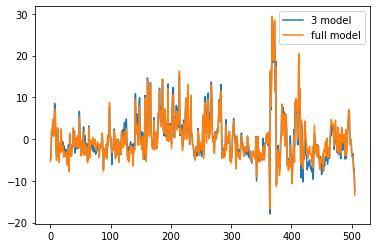

In [21]:
# 3개 모델과 full모델의 잔차비교

import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label = "3 model")
fitted_multi_model2.resid.plot(label = "full model")
plt.legend()

### 2. 상관계수 및 산점도를 통한 다중공선성 확인

In [22]:
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


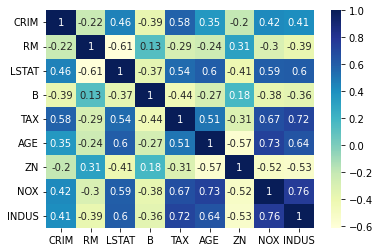

In [23]:
# 상관행렬 시각화
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("darkgray", as_cmap = True)  

sns.heatmap(x_data2.corr(), annot = True, cmap="YlGnBu")
plt.show()

상관행렬과 heatmap을 보면 변수간 상관관계가 높은 경우가 많은 것을 확인할 수 있다.  
상관관계는 -1~1의 분포를 가지며 여기서 0.5가 넘어가는 변수들간의 상관관계가 빈출되는 것은 충분히 다중공선성 발생을 의심할 수 있다.

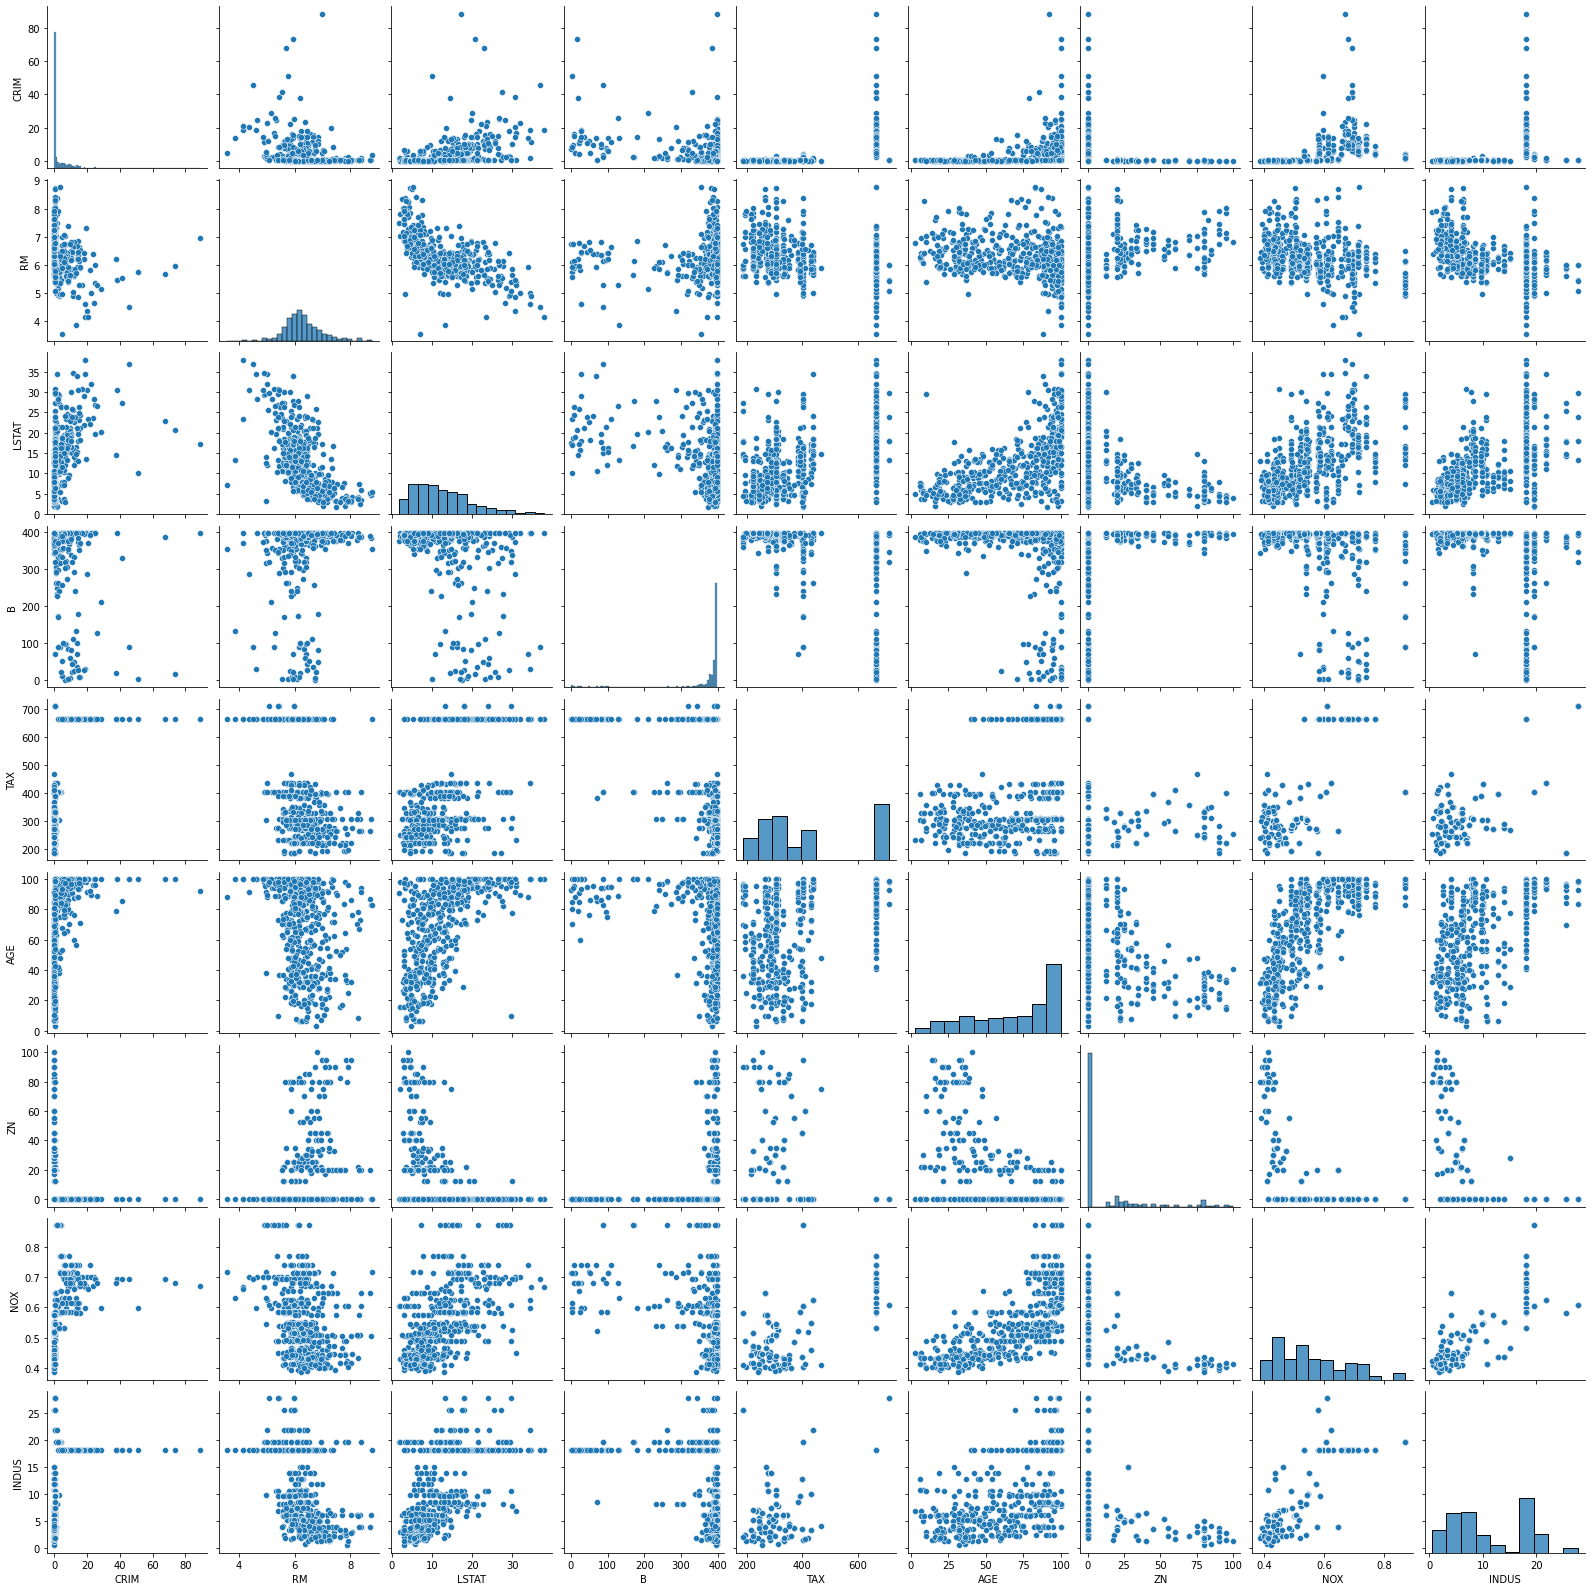

In [24]:
# 변수끼리 산점도를 시각화
sns.pairplot(x_data2)
plt.show()

pairplot은 변수간의 산점도를 나타낸 그래프이다.  
아주 연한 곳은 음의 상관관계, 아주 진한 곳은 양의 상관관계가 있음을 알 수 있다.  
이를 볼때 이 변수들은 서로 관계가 있다가 판단하여 다중공선성을 일으킬 가능성이 높다.

### 3. VIF를 통한 다중공선성 확인

VIF는 variance inflation factor의 줄임말로, 다중공선성을 확인할 때 쓰는 지표 중 하나이다. VIF는 말그대로 "분산팽창요인"이다. 보통은 VIF가 10보다 크면 다중공선성이 있다고 판단한다. 하지만, 다른 과정을 함께 거쳐주는 것이 다중공선성 문제 확인의 신뢰성을 높인다.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

#x_data4 = x_data2.copy()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


분석결과 RM, B, TAX, NOX, INDUS 변수들의 VIFrk 10보다 크다. VIF가 높은 변수가 하나씩 줄어들면 다른 변수들의 VIF에도 영향을 미친다.  
그래서 변수들을 한번에 다 제거하기보다는 하나씩 제거하면서 확인해 나가는 것이 바람직하다.

In [26]:
# nox 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_data3 = x_data2.drop("NOX",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


 전반적으로 약간씩 VIF가 줄어들었다. 하지만 RM은 여전히 매우 높기에 확실하게 제거할 필요가 있다.

In [27]:
# RM 변수 제거후 VIF확인

vif = pd.DataFrame()
x_data4 = x_data3.drop("RM",axis = 1)
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [28]:
# nox 변수를 제거한 x_data3 상수항 추가 후 회귀모델 적합시키기
# nox, rm 변수를 제거한 x_data4 상수항 추가 후 회귀모델 적합시키기

x_data3_ = sm.add_constant(x_data3, has_constant = "add")
x_data4_ = sm.add_constant(x_data4, has_constant = "add")

model_vif = sm.OLS(target, x_data3_)
fitted_model_vif = model_vif.fit()

model_vif2 = sm.OLS(target,x_data4_)
fitted_model_vif2 = model_vif2.fit()

# 두 vif를 통한 변수제거 회귀모델의 결과를 비교

fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          7.62e-112
Time:                        16:00:41   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

맨 처음 모든 변수를 다 더했을 때 OLS의 condition number가 1.04e+04 였는데 NOX 변수를 지우고 나서 8.44e+03으로 떨어진 것을 확인할 수 있다. -> 다중공선성이 완화되었다.

In [29]:
fitted_model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           5.53e-89
Time:                        16:00:41   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

위는 NOX와 RM 모두 제거 후 OLS검정 결과인데, 여기서 condition number는 3.85e+03으로 훨씬 더 낮아졌다. 

## 시각화
### 학습 / 검증 데이터 분할

In [30]:
# 학습 검증데이터 분할
from sklearn.model_selection import train_test_split

X = x_data2_
y = target

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


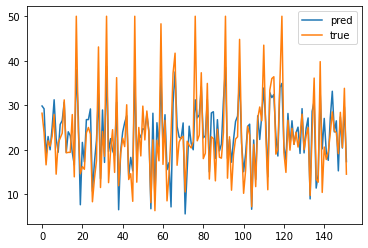

In [31]:
# train_x에 상수항 추가 후 최귀모델 적합

fit_train1 = sm.OLS(train_y,train_x)
fit_train1 = fit_train1.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

In [32]:
x_data3_

,const,CRIM,RM,LSTAT,B,TAX,AGE,ZN,INDUS
0,1.0,0.00632,6.575,4.98,396.90,296,65.2,18.0,2.31
1,1.0,0.02731,6.421,9.14,396.90,242,78.9,0.0,7.07
2,1.0,0.02729,7.185,4.03,392.83,242,61.1,0.0,7.07
3,1.0,0.03237,6.998,2.94,394.63,222,45.8,0.0,2.18
4,1.0,0.06905,7.147,5.33,396.90,222,54.2,0.0,2.18
...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,6.593,9.67,391.99,273,69.1,0.0,11.93
502,1.0,0.04527,6.120,9.08,396.90,273,76.7,0.0,11.93
503,1.0,0.06076,6.976,5.64,396.90,273,91.0,0.0,11.93
504,1.0,0.10959,6.794,6.48,393.45,273,89.3,0.0,11.93


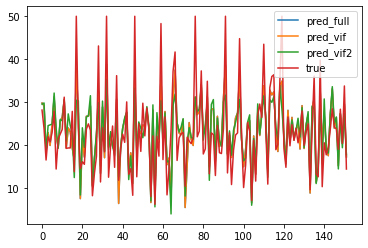

In [33]:
# x_data3와 x_data4 학습 검증데이터 분할

X = x_data3_
y = target
train_x2,test_x2,train_y2,test_y2 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

X = x_data4_
y = target
train_x3,test_x3,train_y3,test_y3 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

# x_data3/x_data4의 회귀모델 적합 (fit_train2,fit_train3)

fit_train2 = sm.OLS(train_y2,train_x2)
fit_train2 = fit_train2.fit()

fit_train3 = sm.OLS(train_y3,train_x3)
fit_train3 = fit_train3.fit()

# vif를 통해 NOX를 지운 데이터 x_data3 , NOX,RM을 지운 데이터 x_data4 full모델 실제값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred_full")
plt.plot(np.array(fit_train2.predict(test_x2)),label = "pred_vif")
plt.plot(np.array(fit_train3.predict(test_x3)),label = "pred_vif2")
plt.plot(np.array(test_y2), label = "true")
plt.legend()
plt.show()

### MSE 비교

In [34]:
from sklearn.metrics import mean_squared_error

#변수 제거가 이루어지지 않은 full모델
mse1 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train1.predict(test_x))

#변수 NOX만 제거한 모델
mse2 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train2.predict(test_x2))

#변수 NOX와 RM 두 개를 제거한 모델
mse3 = mean_squared_error(y_true = test_y["Target"], y_pred = fit_train3.predict(test_x3))

print("전체 특징사용 :", mse1)
print("NOX 제거 :", mse2)
print("RM 제거 :",mse3)

전체 특징사용 : 26.148631468819886
NOX 제거 : 26.140062609846407
RM 제거 : 38.78845317912829


MSE를 확인한 결과 NOX만 제거했을 때 가장 낮았다. 하지만 "RM"은 주택당 방의 수로 Boston 집값에 영향을 충분히 줄 것으로 예상된다.  
흔히 다중공선성이 발생하는 것은 모델의 예측성능을 떨어뜨린다고 판단하지만, 다중공선성을 명확하게 파악하고 제거하여 이상적인 분석결과를 도출하는 것은 케이스마다 다르고 어려운 일이다.